In [1]:
import urllib
import os
from urllib.error import URLError
from urllib.request import urlretrieve

LECUN = 'http://yann.lecun.com/exdb/mnist/'
Train_x_filename = 'train-images-idx3-ubyte'
dir = os.path.abspath('.')  
Train_x_workpath = os.path.join(dir,Train_x_filename + ".gz") 

Train_y_filename = 'train-labels-idx1-ubyte'
Train_y_workpath = os.path.join(dir,Train_y_filename + ".gz") 

Test_x_filename = 't10k-images-idx3-ubyte'
Test_x_workpath = os.path.join(dir,Test_x_filename + ".gz") 

Test_y_filename = 't10k-labels-idx1-ubyte'
Test_y_workpath = os.path.join(dir,Test_y_filename + ".gz") 



try:
    urlretrieve(LECUN + Train_x_filename + ".gz", Train_x_workpath)
except URLError:
    raise RuntimeError('Error downloading resource!')
    
try:
    urlretrieve(LECUN + Train_y_filename + ".gz", Train_y_workpath)
except URLError:
    raise RuntimeError('Error downloading resource!')
    
try:
    urlretrieve(LECUN + Test_x_filename + ".gz", Test_x_workpath)
except URLError:
    raise RuntimeError('Error downloading resource!')
    
try:
    urlretrieve(LECUN + Test_y_filename + ".gz", Test_y_workpath)
except URLError:
    raise RuntimeError('Error downloading resource!')

In [2]:
import gzip

def ungz(gz_filename):
   

    ungz_filename = gz_filename.replace('.gz','')
    f_gz = gzip.GzipFile(gz_filename)
    f_ungz = open(ungz_filename,'wb') 
    f_ungz.writelines(f_gz)
    f_ungz.close()
    f_gz.close()
ungz(Train_x_filename + ".gz" )
ungz(Train_y_filename + ".gz")
ungz(Test_x_filename + ".gz")
ungz(Test_y_filename + ".gz")

In [3]:
import numpy as np
from scipy import stats

Train_x_file_object = open(Train_x_filename, "rb")


magic_number =int.from_bytes(Train_x_file_object.read(4), "big")

print("magic_number: " + str(magic_number))

Train_number = int.from_bytes(Train_x_file_object.read(4), "big")

print("Train_number: " + str(Train_number))

num_rows = int.from_bytes(Train_x_file_object.read(4), "big")
print("num_row: " + str(num_rows))

num_colums = int.from_bytes(Train_x_file_object.read(4), "big")
print("num_row: " + str(num_colums))

train_size = 50000
vali_size = 10000



############################Train X Data####################################################
train_X_data = np.zeros((train_size, 784))

for i in range(0, train_size):
   train_X_data[i] = np.frombuffer(Train_x_file_object.read(784), dtype=np.uint8)

#print(train_X_data[6])

#
for i in range(train_size):
    train_X_data[i] = stats.zscore(train_X_data[i])

# for i in range(train_size):
#     train_X_data[i] = train_X_data[i]/np.linalg.norm(train_X_data[i])

#print(train_X_data[2])
print(train_X_data.shape)

# ###############################Vali X Data#########################################################

# vali_X_data = np.zeros((vali_size, 784))
# for i in range(0, vali_size):
#     vali_X_data[i] = np.frombuffer(Train_x_file_object.read(784), dtype = np.uint8)
# for i in range(vali_size):
#     vali_X_data[i] = stats.zscore(vali_X_data[i])
# # for i in range(vali_size):
# #     vali_X_data[i] = vali_X_data[i]/np.linalg.norm(vali_X_data[i])
# print(vali_X_data.shape)


magic_number: 2051
Train_number: 60000
num_row: 28
num_row: 28
(50000, 784)


In [4]:
Train_y_file_object = open(Train_y_filename, "rb")

magic_number_1 = int.from_bytes(Train_y_file_object.read(4), "big")

print("magic_number: " + str(magic_number_1))
Train_y_file_object.read(4)

Train_Y_data = np.zeros((train_size, 10))
for i in range(train_size):
    num = int.from_bytes(Train_y_file_object.read(1), "big")
    Train_Y_data[i][num] = 1.0
print(Train_Y_data.shape)

# vali_Y_data = np.zeros((vali_size, 10))
# for i in range(vali_size):
#     num = int.from_bytes(Train_y_file_object.read(1), "big")
#     vali_Y_data[i][num] = 1.0
# print(vali_Y_data.shape)

magic_number: 2049
(50000, 10)


In [5]:
print(Train_Y_data[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [6]:
count_list = np.array([0,0,0,0,0,0,0,0,0,0])
Train_X = np.empty((10000, 784), dtype = "float")
Train_Y = np.empty((10000, 10), dtype = "float")
countt = 0
for i in range(train_X_data.shape[0]):
    if countt >= 10000:
        break
    for j in range(10):
        if Train_Y_data[i][j] == 1:
            if count_list[j] <1000:
                Train_X[countt] = train_X_data[i]
                Train_Y[countt] = Train_Y_data[i]
                count_list[j] +=1
                countt+=1
    
print(Train_X.shape)
print(Train_Y.shape)
print(count_list)

(10000, 784)
(10000, 10)
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


In [7]:
from sklearn import utils
Train_X, Train_Y = utils.shuffle(Train_X, Train_Y)
print(Train_Y[:10])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [8]:
test_size = 10000

Test_x_file_object = open(Test_x_filename, "rb")
magic_number_2 = int.from_bytes(Test_x_file_object.read(4), "big")
print(magic_number_2)
print(int.from_bytes(Test_x_file_object.read(4), "big"))
num_rows = int.from_bytes(Test_x_file_object.read(4), "big")
print("num_row: " + str(num_rows))

num_colums = int.from_bytes(Test_x_file_object.read(4), "big")
print("num_row: " + str(num_colums))

Test_X_data = np.zeros((test_size, 784))
for i in range(test_size):
    Test_X_data[i] = np.frombuffer(Test_x_file_object.read(784), dtype=np.uint8)
for i in range(test_size):
    Test_X_data[i] = stats.zscore(Test_X_data[i])
#print(Test_X_data[0])

# for i in range(test_size):
#     Test_X_data[i] = Test_X_data[i]/np.linalg.norm(Test_X_data[i])
print(Test_X_data.shape)


Test_y_file_object = open(Test_y_filename, "rb")
magic_number_3 = int.from_bytes(Test_y_file_object.read(4), "big")
print(magic_number_3)
print(int.from_bytes(Test_y_file_object.read(4), "big"))
Test_Y_data = np.zeros((test_size, 10))

for i in range(test_size):
    num = int.from_bytes(Test_y_file_object.read(1), "big")
    Test_Y_data[i][num] = 1.0
print(Test_Y_data.shape)
#print(Test_Y_data[2])


2051
10000
num_row: 28
num_row: 28
(10000, 784)
2049
10000
(10000, 10)


## 1. Set up model

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
def build_model(k,p):
    model = keras.Sequential()
    model.add(keras.Input(shape=(784)))
    model.add(layers.Dense(k,activation='relu', kernel_initializer='HeNormal'))
    if p<1.0:
        model.add(tf.keras.layers.Dropout(p))
        
    model.add(layers.Dense(10, activation='softmax', kernel_initializer='HeNormal'))
    
    

    #model.summary()
    return model





In [11]:
model = build_model(3,0.5)

In [12]:
model.compile(optimizer="Adam", loss='CategoricalCrossentropy', metrics=['accuracy'])


In [13]:
History = model.fit(Train_X, Train_Y, epochs=20, batch_size=64, validation_data = (Test_X_data, Test_Y_data))

Epoch 1/20
157/157 [==============================] - 0s 2ms/step - loss: 2.2656 - accuracy: 0.1312 - val_loss: 2.1263 - val_accuracy: 0.1999
Epoch 2/20
157/157 [==============================] - 0s 902us/step - loss: 2.1699 - accuracy: 0.1559 - val_loss: 2.0580 - val_accuracy: 0.2191
Epoch 3/20
157/157 [==============================] - 0s 883us/step - loss: 2.1640 - accuracy: 0.1535 - val_loss: 2.0156 - val_accuracy: 0.2200
Epoch 4/20
157/157 [==============================] - 0s 870us/step - loss: 2.1428 - accuracy: 0.1582 - val_loss: 1.9963 - val_accuracy: 0.2290
Epoch 5/20
157/157 [==============================] - 0s 870us/step - loss: 2.1446 - accuracy: 0.1578 - val_loss: 1.9880 - val_accuracy: 0.2373
Epoch 6/20
157/157 [==============================] - 0s 896us/step - loss: 2.1423 - accuracy: 0.1591 - val_loss: 1.9946 - val_accuracy: 0.2430
Epoch 7/20
157/157 [==============================] - 0s 857us/step - loss: 2.1382 - accuracy: 0.1592 - val_loss: 1.9778 - val_accuracy: 0

In [14]:
History.history

{'loss': [2.2656338214874268,
  2.169862747192383,
  2.1640212535858154,
  2.1427910327911377,
  2.144602060317993,
  2.1423254013061523,
  2.138230562210083,
  2.1232619285583496,
  2.133690118789673,
  2.1357614994049072,
  2.1297109127044678,
  2.1329166889190674,
  2.1194143295288086,
  2.1225244998931885,
  2.1141347885131836,
  2.133516311645508,
  2.1275012493133545,
  2.1200292110443115,
  2.1290369033813477,
  2.1143229007720947],
 'accuracy': [0.13120000064373016,
  0.1559000015258789,
  0.1535000056028366,
  0.1581999957561493,
  0.15780000388622284,
  0.1590999960899353,
  0.15919999778270721,
  0.16290000081062317,
  0.15600000321865082,
  0.16259999573230743,
  0.16509999334812164,
  0.16349999606609344,
  0.16609999537467957,
  0.1678999960422516,
  0.1696999967098236,
  0.1656000018119812,
  0.1688999980688095,
  0.16619999706745148,
  0.16869999468326569,
  0.1673000007867813],
 'val_loss': [2.1262731552124023,
  2.057966947555542,
  2.015641689300537,
  1.996261477470

## 2. grid testing

In [15]:
K_list = [1, 3, 5, 10, 15, 25, 40]
P_list = [0.1, 0.5, 1.0]


In [16]:
def grid_training(K, P,epoch, Train_X, Train_Y, Test_X_data, Test_Y_data):
    K_size = len(K)
    P_size = len(P)
    Train_acc = np.zeros((K_size,P_size))
    Test_acc = np.zeros((K_size,P_size))
    Train_loss = np.zeros((K_size,P_size))
    
    for k_i, k_v in enumerate(K):
        for p_i, p_v in enumerate(P):
            model = build_model(k_v, p_v)
            model.compile(optimizer="Adam", loss='CategoricalCrossentropy', metrics=['accuracy'])
            History = model.fit(Train_X, Train_Y, epochs=epoch, batch_size=64, validation_data = (Test_X_data, Test_Y_data))
            Test_acc[k_i][p_i] = np.max(History.history['val_accuracy'])
            best_epouch = np.argmax(History.history['val_accuracy'])
            Train_acc[k_i][p_i] = History.history['accuracy'][best_epouch]
            
            Train_loss[k_i][p_i] = History.history['loss'][best_epouch]
            
    return Train_acc, Test_acc, Train_loss

In [17]:
Train_acc, Test_acc, Train_loss = grid_training(K_list, P_list, 80,Train_X, Train_Y, Test_X_data, Test_Y_data)

Epoch 1/80
157/157 [==============================] - 0s 2ms/step - loss: 2.3298 - accuracy: 0.0977 - val_loss: 2.3028 - val_accuracy: 0.0980
Epoch 2/80
157/157 [==============================] - 0s 858us/step - loss: 2.3027 - accuracy: 0.0948 - val_loss: 2.3028 - val_accuracy: 0.0980
Epoch 3/80
157/157 [==============================] - 0s 813us/step - loss: 2.3027 - accuracy: 0.0909 - val_loss: 2.3028 - val_accuracy: 0.0974
Epoch 4/80
157/157 [==============================] - 0s 838us/step - loss: 2.3027 - accuracy: 0.0936 - val_loss: 2.3028 - val_accuracy: 0.0980
Epoch 5/80
157/157 [==============================] - 0s 813us/step - loss: 2.3028 - accuracy: 0.0932 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 6/80
157/157 [==============================] - 0s 826us/step - loss: 2.3027 - accuracy: 0.0935 - val_loss: 2.3028 - val_accuracy: 0.0892
Epoch 7/80
157/157 [==============================] - 0s 807us/step - loss: 2.3027 - accuracy: 0.0966 - val_loss: 2.3028 - val_accuracy: 0

Epoch 56/80
157/157 [==============================] - 0s 832us/step - loss: 1.9477 - accuracy: 0.2030 - val_loss: 1.9089 - val_accuracy: 0.2156
Epoch 57/80
157/157 [==============================] - 0s 845us/step - loss: 1.9393 - accuracy: 0.2116 - val_loss: 1.9020 - val_accuracy: 0.2192
Epoch 58/80
157/157 [==============================] - 0s 813us/step - loss: 1.9341 - accuracy: 0.2059 - val_loss: 1.8918 - val_accuracy: 0.2265
Epoch 59/80
157/157 [==============================] - 0s 832us/step - loss: 1.9289 - accuracy: 0.2112 - val_loss: 1.8834 - val_accuracy: 0.2244
Epoch 60/80
157/157 [==============================] - 0s 826us/step - loss: 1.9217 - accuracy: 0.2095 - val_loss: 1.8885 - val_accuracy: 0.2321
Epoch 61/80
157/157 [==============================] - 0s 832us/step - loss: 1.9254 - accuracy: 0.2096 - val_loss: 1.8806 - val_accuracy: 0.2284
Epoch 62/80
157/157 [==============================] - 0s 832us/step - loss: 1.9236 - accuracy: 0.2118 - val_loss: 1.8772 - val_ac

157/157 [==============================] - 0s 832us/step - loss: 2.1613 - accuracy: 0.1518 - val_loss: 2.0266 - val_accuracy: 0.2177
Epoch 33/80
157/157 [==============================] - 0s 813us/step - loss: 2.1473 - accuracy: 0.1577 - val_loss: 2.0259 - val_accuracy: 0.2204
Epoch 34/80
157/157 [==============================] - 0s 832us/step - loss: 2.1639 - accuracy: 0.1528 - val_loss: 2.0343 - val_accuracy: 0.2162
Epoch 35/80
157/157 [==============================] - 0s 807us/step - loss: 2.1518 - accuracy: 0.1547 - val_loss: 2.0216 - val_accuracy: 0.2164
Epoch 36/80
157/157 [==============================] - 0s 813us/step - loss: 2.1638 - accuracy: 0.1490 - val_loss: 2.0177 - val_accuracy: 0.2232
Epoch 37/80
157/157 [==============================] - 0s 813us/step - loss: 2.1678 - accuracy: 0.1531 - val_loss: 2.0677 - val_accuracy: 0.2007
Epoch 38/80
157/157 [==============================] - 0s 819us/step - loss: 2.1587 - accuracy: 0.1535 - val_loss: 2.0333 - val_accuracy: 0.21

157/157 [==============================] - 0s 800us/step - loss: 2.3027 - accuracy: 0.0944 - val_loss: 2.3026 - val_accuracy: 0.0982
Epoch 9/80
157/157 [==============================] - 0s 813us/step - loss: 2.3027 - accuracy: 0.0960 - val_loss: 2.3026 - val_accuracy: 0.0982
Epoch 10/80
157/157 [==============================] - 0s 819us/step - loss: 2.3028 - accuracy: 0.0930 - val_loss: 2.3026 - val_accuracy: 0.1009
Epoch 11/80
157/157 [==============================] - 0s 826us/step - loss: 2.3028 - accuracy: 0.0953 - val_loss: 2.3026 - val_accuracy: 0.1135
Epoch 12/80
157/157 [==============================] - 0s 813us/step - loss: 2.3028 - accuracy: 0.0960 - val_loss: 2.3027 - val_accuracy: 0.0974
Epoch 13/80
157/157 [==============================] - 0s 800us/step - loss: 2.3027 - accuracy: 0.0945 - val_loss: 2.3026 - val_accuracy: 0.0974
Epoch 14/80
157/157 [==============================] - 0s 810us/step - loss: 2.3027 - accuracy: 0.0924 - val_loss: 2.3025 - val_accuracy: 0.113

157/157 [==============================] - 0s 826us/step - loss: 2.3027 - accuracy: 0.0959 - val_loss: 2.3026 - val_accuracy: 0.0982
Epoch 65/80
157/157 [==============================] - 0s 807us/step - loss: 2.3027 - accuracy: 0.0958 - val_loss: 2.3026 - val_accuracy: 0.1010
Epoch 66/80
157/157 [==============================] - 0s 846us/step - loss: 2.3027 - accuracy: 0.0950 - val_loss: 2.3026 - val_accuracy: 0.1009
Epoch 67/80
157/157 [==============================] - 0s 813us/step - loss: 2.3027 - accuracy: 0.0940 - val_loss: 2.3026 - val_accuracy: 0.1009
Epoch 68/80
157/157 [==============================] - 0s 807us/step - loss: 2.3028 - accuracy: 0.0937 - val_loss: 2.3026 - val_accuracy: 0.0892
Epoch 69/80
157/157 [==============================] - 0s 813us/step - loss: 2.3027 - accuracy: 0.0959 - val_loss: 2.3027 - val_accuracy: 0.0892
Epoch 70/80
157/157 [==============================] - 0s 807us/step - loss: 2.3028 - accuracy: 0.0928 - val_loss: 2.3026 - val_accuracy: 0.10

157/157 [==============================] - 0s 870us/step - loss: 1.3858 - accuracy: 0.5080 - val_loss: 1.2663 - val_accuracy: 0.5584
Epoch 41/80
157/157 [==============================] - 0s 883us/step - loss: 1.3942 - accuracy: 0.5076 - val_loss: 1.2804 - val_accuracy: 0.5478
Epoch 42/80
157/157 [==============================] - 0s 870us/step - loss: 1.3860 - accuracy: 0.5169 - val_loss: 1.2422 - val_accuracy: 0.5679
Epoch 43/80
157/157 [==============================] - 0s 851us/step - loss: 1.3752 - accuracy: 0.5256 - val_loss: 1.2402 - val_accuracy: 0.5718
Epoch 44/80
157/157 [==============================] - 0s 896us/step - loss: 1.3885 - accuracy: 0.5193 - val_loss: 1.2491 - val_accuracy: 0.5720
Epoch 45/80
157/157 [==============================] - 0s 870us/step - loss: 1.3859 - accuracy: 0.5261 - val_loss: 1.2376 - val_accuracy: 0.5772
Epoch 46/80
157/157 [==============================] - 0s 858us/step - loss: 1.3787 - accuracy: 0.5242 - val_loss: 1.2280 - val_accuracy: 0.57

157/157 [==============================] - 0s 864us/step - loss: 1.8496 - accuracy: 0.2707 - val_loss: 1.4311 - val_accuracy: 0.4752
Epoch 17/80
157/157 [==============================] - 0s 870us/step - loss: 1.8323 - accuracy: 0.2739 - val_loss: 1.4408 - val_accuracy: 0.4841
Epoch 18/80
157/157 [==============================] - 0s 858us/step - loss: 1.8373 - accuracy: 0.2782 - val_loss: 1.4433 - val_accuracy: 0.4779
Epoch 19/80
157/157 [==============================] - 0s 864us/step - loss: 1.8318 - accuracy: 0.2776 - val_loss: 1.4329 - val_accuracy: 0.4907
Epoch 20/80
157/157 [==============================] - 0s 870us/step - loss: 1.8509 - accuracy: 0.2685 - val_loss: 1.4430 - val_accuracy: 0.4897
Epoch 21/80
157/157 [==============================] - 0s 870us/step - loss: 1.8283 - accuracy: 0.2796 - val_loss: 1.4527 - val_accuracy: 0.5009
Epoch 22/80
157/157 [==============================] - 0s 857us/step - loss: 1.8290 - accuracy: 0.2808 - val_loss: 1.4139 - val_accuracy: 0.49

157/157 [==============================] - 0s 858us/step - loss: 1.7785 - accuracy: 0.2890 - val_loss: 1.3584 - val_accuracy: 0.5245
Epoch 73/80
157/157 [==============================] - 0s 864us/step - loss: 1.7999 - accuracy: 0.2872 - val_loss: 1.3717 - val_accuracy: 0.5239
Epoch 74/80
157/157 [==============================] - 0s 877us/step - loss: 1.7690 - accuracy: 0.2973 - val_loss: 1.3702 - val_accuracy: 0.5239
Epoch 75/80
157/157 [==============================] - 0s 864us/step - loss: 1.7721 - accuracy: 0.2958 - val_loss: 1.3773 - val_accuracy: 0.5324
Epoch 76/80
157/157 [==============================] - 0s 864us/step - loss: 1.7669 - accuracy: 0.2946 - val_loss: 1.3550 - val_accuracy: 0.5367
Epoch 77/80
157/157 [==============================] - 0s 858us/step - loss: 1.7759 - accuracy: 0.2925 - val_loss: 1.3617 - val_accuracy: 0.5360
Epoch 78/80
157/157 [==============================] - 0s 864us/step - loss: 1.7733 - accuracy: 0.2974 - val_loss: 1.3422 - val_accuracy: 0.53

157/157 [==============================] - 0s 858us/step - loss: 1.1374 - accuracy: 0.5735 - val_loss: 1.2478 - val_accuracy: 0.5465
Epoch 47/80
157/157 [==============================] - 0s 871us/step - loss: 1.1346 - accuracy: 0.5759 - val_loss: 1.2573 - val_accuracy: 0.5281
Epoch 48/80
157/157 [==============================] - 0s 851us/step - loss: 1.1341 - accuracy: 0.5728 - val_loss: 1.2506 - val_accuracy: 0.5417
Epoch 49/80
157/157 [==============================] - 0s 870us/step - loss: 1.1342 - accuracy: 0.5743 - val_loss: 1.2605 - val_accuracy: 0.5507
Epoch 50/80
157/157 [==============================] - 0s 839us/step - loss: 1.1340 - accuracy: 0.5720 - val_loss: 1.2500 - val_accuracy: 0.5443
Epoch 51/80
157/157 [==============================] - 0s 851us/step - loss: 1.1319 - accuracy: 0.5772 - val_loss: 1.2523 - val_accuracy: 0.5328
Epoch 52/80
157/157 [==============================] - 0s 851us/step - loss: 1.1307 - accuracy: 0.5746 - val_loss: 1.2469 - val_accuracy: 0.55

157/157 [==============================] - 0s 896us/step - loss: 0.7033 - accuracy: 0.7774 - val_loss: 0.5648 - val_accuracy: 0.8525
Epoch 23/80
157/157 [==============================] - 0s 889us/step - loss: 0.7030 - accuracy: 0.7818 - val_loss: 0.5578 - val_accuracy: 0.8511
Epoch 24/80
157/157 [==============================] - 0s 883us/step - loss: 0.6989 - accuracy: 0.7802 - val_loss: 0.5605 - val_accuracy: 0.8524
Epoch 25/80
157/157 [==============================] - 0s 908us/step - loss: 0.6922 - accuracy: 0.7839 - val_loss: 0.5637 - val_accuracy: 0.8470
Epoch 26/80
157/157 [==============================] - 0s 883us/step - loss: 0.6758 - accuracy: 0.7857 - val_loss: 0.5546 - val_accuracy: 0.8496
Epoch 27/80
157/157 [==============================] - 0s 883us/step - loss: 0.6606 - accuracy: 0.7920 - val_loss: 0.5502 - val_accuracy: 0.8541
Epoch 28/80
157/157 [==============================] - 0s 877us/step - loss: 0.6746 - accuracy: 0.7856 - val_loss: 0.5503 - val_accuracy: 0.85

157/157 [==============================] - 0s 889us/step - loss: 0.5776 - accuracy: 0.8111 - val_loss: 0.5223 - val_accuracy: 0.8585
Epoch 79/80
157/157 [==============================] - 0s 877us/step - loss: 0.5872 - accuracy: 0.8064 - val_loss: 0.5254 - val_accuracy: 0.8560
Epoch 80/80
157/157 [==============================] - 0s 889us/step - loss: 0.5904 - accuracy: 0.8071 - val_loss: 0.5197 - val_accuracy: 0.8588
Epoch 1/80
157/157 [==============================] - 0s 2ms/step - loss: 2.2002 - accuracy: 0.1869 - val_loss: 1.8493 - val_accuracy: 0.3214
Epoch 2/80
157/157 [==============================] - 0s 889us/step - loss: 1.9368 - accuracy: 0.2701 - val_loss: 1.5452 - val_accuracy: 0.5289
Epoch 3/80
157/157 [==============================] - 0s 889us/step - loss: 1.8016 - accuracy: 0.3301 - val_loss: 1.3882 - val_accuracy: 0.6194
Epoch 4/80
157/157 [==============================] - 0s 883us/step - loss: 1.7178 - accuracy: 0.3592 - val_loss: 1.3062 - val_accuracy: 0.6346
Epo

157/157 [==============================] - 0s 877us/step - loss: 1.5108 - accuracy: 0.4541 - val_loss: 0.9515 - val_accuracy: 0.7914
Epoch 55/80
157/157 [==============================] - 0s 851us/step - loss: 1.4888 - accuracy: 0.4634 - val_loss: 0.9518 - val_accuracy: 0.7845
Epoch 56/80
157/157 [==============================] - 0s 864us/step - loss: 1.4950 - accuracy: 0.4610 - val_loss: 0.9739 - val_accuracy: 0.7846
Epoch 57/80
157/157 [==============================] - 0s 864us/step - loss: 1.4657 - accuracy: 0.4722 - val_loss: 0.9617 - val_accuracy: 0.7867
Epoch 58/80
157/157 [==============================] - 0s 870us/step - loss: 1.4848 - accuracy: 0.4653 - val_loss: 0.9650 - val_accuracy: 0.7794
Epoch 59/80
157/157 [==============================] - 0s 864us/step - loss: 1.4974 - accuracy: 0.4613 - val_loss: 0.9459 - val_accuracy: 0.8037
Epoch 60/80
157/157 [==============================] - 0s 870us/step - loss: 1.4951 - accuracy: 0.4602 - val_loss: 0.9470 - val_accuracy: 0.79

157/157 [==============================] - 0s 858us/step - loss: 0.3016 - accuracy: 0.9110 - val_loss: 0.4521 - val_accuracy: 0.8739
Epoch 31/80
157/157 [==============================] - 0s 858us/step - loss: 0.3002 - accuracy: 0.9103 - val_loss: 0.4536 - val_accuracy: 0.8715
Epoch 32/80
157/157 [==============================] - 0s 864us/step - loss: 0.3005 - accuracy: 0.9085 - val_loss: 0.4528 - val_accuracy: 0.8738
Epoch 33/80
157/157 [==============================] - 0s 858us/step - loss: 0.2952 - accuracy: 0.9140 - val_loss: 0.4557 - val_accuracy: 0.8727
Epoch 34/80
157/157 [==============================] - 0s 864us/step - loss: 0.2946 - accuracy: 0.9122 - val_loss: 0.4601 - val_accuracy: 0.8725
Epoch 35/80
157/157 [==============================] - 0s 858us/step - loss: 0.2955 - accuracy: 0.9128 - val_loss: 0.4528 - val_accuracy: 0.8717
Epoch 36/80
157/157 [==============================] - 0s 858us/step - loss: 0.2887 - accuracy: 0.9171 - val_loss: 0.4613 - val_accuracy: 0.87

157/157 [==============================] - 0s 915us/step - loss: 0.4929 - accuracy: 0.8385 - val_loss: 0.3655 - val_accuracy: 0.8977
Epoch 7/80
157/157 [==============================] - 0s 908us/step - loss: 0.4721 - accuracy: 0.8453 - val_loss: 0.3599 - val_accuracy: 0.8995
Epoch 8/80
157/157 [==============================] - 0s 908us/step - loss: 0.4667 - accuracy: 0.8435 - val_loss: 0.3482 - val_accuracy: 0.9045
Epoch 9/80
157/157 [==============================] - 0s 902us/step - loss: 0.4351 - accuracy: 0.8582 - val_loss: 0.3461 - val_accuracy: 0.9015
Epoch 10/80
157/157 [==============================] - 0s 902us/step - loss: 0.4380 - accuracy: 0.8525 - val_loss: 0.3374 - val_accuracy: 0.9051
Epoch 11/80
157/157 [==============================] - 0s 915us/step - loss: 0.4150 - accuracy: 0.8597 - val_loss: 0.3497 - val_accuracy: 0.9004
Epoch 12/80
157/157 [==============================] - 0s 908us/step - loss: 0.4187 - accuracy: 0.8564 - val_loss: 0.3354 - val_accuracy: 0.9047


157/157 [==============================] - 0s 908us/step - loss: 0.2758 - accuracy: 0.9078 - val_loss: 0.3588 - val_accuracy: 0.9031
Epoch 63/80
157/157 [==============================] - 0s 896us/step - loss: 0.2792 - accuracy: 0.9039 - val_loss: 0.3618 - val_accuracy: 0.9031
Epoch 64/80
157/157 [==============================] - 0s 908us/step - loss: 0.2797 - accuracy: 0.9035 - val_loss: 0.3718 - val_accuracy: 0.9006
Epoch 65/80
157/157 [==============================] - 0s 889us/step - loss: 0.2780 - accuracy: 0.9020 - val_loss: 0.3645 - val_accuracy: 0.9034
Epoch 66/80
157/157 [==============================] - 0s 896us/step - loss: 0.2702 - accuracy: 0.9070 - val_loss: 0.3610 - val_accuracy: 0.9018
Epoch 67/80
157/157 [==============================] - 0s 908us/step - loss: 0.2665 - accuracy: 0.9095 - val_loss: 0.3683 - val_accuracy: 0.9001
Epoch 68/80
157/157 [==============================] - 0s 902us/step - loss: 0.2724 - accuracy: 0.9086 - val_loss: 0.3658 - val_accuracy: 0.90

157/157 [==============================] - 0s 889us/step - loss: 0.9995 - accuracy: 0.5936 - val_loss: 0.4858 - val_accuracy: 0.8741
Epoch 39/80
157/157 [==============================] - 0s 902us/step - loss: 1.0155 - accuracy: 0.5927 - val_loss: 0.5004 - val_accuracy: 0.8721
Epoch 40/80
157/157 [==============================] - 0s 908us/step - loss: 1.0307 - accuracy: 0.5899 - val_loss: 0.4999 - val_accuracy: 0.8765
Epoch 41/80
157/157 [==============================] - 0s 889us/step - loss: 0.9995 - accuracy: 0.5991 - val_loss: 0.4731 - val_accuracy: 0.8735
Epoch 42/80
157/157 [==============================] - 0s 908us/step - loss: 1.0123 - accuracy: 0.5939 - val_loss: 0.4986 - val_accuracy: 0.8714
Epoch 43/80
157/157 [==============================] - 0s 908us/step - loss: 1.0040 - accuracy: 0.5890 - val_loss: 0.5204 - val_accuracy: 0.8738
Epoch 44/80
157/157 [==============================] - 0s 889us/step - loss: 1.0088 - accuracy: 0.5910 - val_loss: 0.5007 - val_accuracy: 0.87

157/157 [==============================] - 0s 870us/step - loss: 0.1867 - accuracy: 0.9469 - val_loss: 0.3059 - val_accuracy: 0.9102
Epoch 15/80
157/157 [==============================] - 0s 883us/step - loss: 0.1791 - accuracy: 0.9499 - val_loss: 0.3048 - val_accuracy: 0.9106
Epoch 16/80
157/157 [==============================] - 0s 883us/step - loss: 0.1758 - accuracy: 0.9475 - val_loss: 0.3010 - val_accuracy: 0.9127
Epoch 17/80
157/157 [==============================] - 0s 877us/step - loss: 0.1657 - accuracy: 0.9518 - val_loss: 0.2958 - val_accuracy: 0.9135
Epoch 18/80
157/157 [==============================] - 0s 883us/step - loss: 0.1657 - accuracy: 0.9521 - val_loss: 0.2997 - val_accuracy: 0.9144
Epoch 19/80
157/157 [==============================] - 0s 902us/step - loss: 0.1623 - accuracy: 0.9536 - val_loss: 0.3062 - val_accuracy: 0.9145
Epoch 20/80
157/157 [==============================] - 0s 934us/step - loss: 0.1528 - accuracy: 0.9567 - val_loss: 0.3059 - val_accuracy: 0.91

157/157 [==============================] - 0s 896us/step - loss: 0.0572 - accuracy: 0.9853 - val_loss: 0.4451 - val_accuracy: 0.9064
Epoch 71/80
157/157 [==============================] - 0s 921us/step - loss: 0.0553 - accuracy: 0.9866 - val_loss: 0.4348 - val_accuracy: 0.9092
Epoch 72/80
157/157 [==============================] - 0s 896us/step - loss: 0.0537 - accuracy: 0.9873 - val_loss: 0.4443 - val_accuracy: 0.9073
Epoch 73/80
157/157 [==============================] - 0s 896us/step - loss: 0.0554 - accuracy: 0.9863 - val_loss: 0.4438 - val_accuracy: 0.9088
Epoch 74/80
157/157 [==============================] - 0s 896us/step - loss: 0.0535 - accuracy: 0.9870 - val_loss: 0.4548 - val_accuracy: 0.9089
Epoch 75/80
157/157 [==============================] - 0s 902us/step - loss: 0.0507 - accuracy: 0.9880 - val_loss: 0.4587 - val_accuracy: 0.9073
Epoch 76/80
157/157 [==============================] - 0s 902us/step - loss: 0.0525 - accuracy: 0.9870 - val_loss: 0.4745 - val_accuracy: 0.90

157/157 [==============================] - 0s 870us/step - loss: 0.1622 - accuracy: 0.9436 - val_loss: 0.3003 - val_accuracy: 0.9232
Epoch 47/80
157/157 [==============================] - 0s 880us/step - loss: 0.1647 - accuracy: 0.9449 - val_loss: 0.3015 - val_accuracy: 0.9222
Epoch 48/80
157/157 [==============================] - 0s 877us/step - loss: 0.1569 - accuracy: 0.9465 - val_loss: 0.3045 - val_accuracy: 0.9229
Epoch 49/80
157/157 [==============================] - 0s 877us/step - loss: 0.1554 - accuracy: 0.9472 - val_loss: 0.3060 - val_accuracy: 0.9235
Epoch 50/80
157/157 [==============================] - 0s 889us/step - loss: 0.1475 - accuracy: 0.9522 - val_loss: 0.3099 - val_accuracy: 0.9229
Epoch 51/80
157/157 [==============================] - 0s 896us/step - loss: 0.1431 - accuracy: 0.9526 - val_loss: 0.3014 - val_accuracy: 0.9248
Epoch 52/80
157/157 [==============================] - 0s 877us/step - loss: 0.1512 - accuracy: 0.9512 - val_loss: 0.3027 - val_accuracy: 0.92

157/157 [==============================] - 0s 908us/step - loss: 0.8379 - accuracy: 0.6870 - val_loss: 0.3732 - val_accuracy: 0.8993
Epoch 23/80
157/157 [==============================] - 0s 889us/step - loss: 0.8217 - accuracy: 0.7001 - val_loss: 0.3731 - val_accuracy: 0.8993
Epoch 24/80
157/157 [==============================] - 0s 896us/step - loss: 0.8462 - accuracy: 0.6859 - val_loss: 0.3728 - val_accuracy: 0.9033
Epoch 25/80
157/157 [==============================] - 0s 902us/step - loss: 0.8251 - accuracy: 0.6966 - val_loss: 0.3620 - val_accuracy: 0.9040
Epoch 26/80
157/157 [==============================] - 0s 927us/step - loss: 0.8018 - accuracy: 0.7042 - val_loss: 0.3727 - val_accuracy: 0.9051
Epoch 27/80
157/157 [==============================] - 0s 902us/step - loss: 0.8078 - accuracy: 0.7016 - val_loss: 0.3610 - val_accuracy: 0.9061
Epoch 28/80
157/157 [==============================] - 0s 896us/step - loss: 0.8160 - accuracy: 0.6976 - val_loss: 0.3569 - val_accuracy: 0.90

157/157 [==============================] - 0s 908us/step - loss: 0.7277 - accuracy: 0.7439 - val_loss: 0.3766 - val_accuracy: 0.9050
Epoch 79/80
157/157 [==============================] - 0s 902us/step - loss: 0.7327 - accuracy: 0.7316 - val_loss: 0.3643 - val_accuracy: 0.9067
Epoch 80/80
157/157 [==============================] - 0s 902us/step - loss: 0.7073 - accuracy: 0.7433 - val_loss: 0.3656 - val_accuracy: 0.9084
Epoch 1/80
157/157 [==============================] - 0s 2ms/step - loss: 0.9798 - accuracy: 0.6853 - val_loss: 0.5072 - val_accuracy: 0.8525
Epoch 2/80
157/157 [==============================] - 0s 889us/step - loss: 0.3992 - accuracy: 0.8860 - val_loss: 0.3849 - val_accuracy: 0.8817
Epoch 3/80
157/157 [==============================] - 0s 908us/step - loss: 0.3040 - accuracy: 0.9124 - val_loss: 0.3225 - val_accuracy: 0.9042
Epoch 4/80
157/157 [==============================] - 0s 908us/step - loss: 0.2601 - accuracy: 0.9224 - val_loss: 0.3027 - val_accuracy: 0.9112
Epo

157/157 [==============================] - 0s 889us/step - loss: 0.0225 - accuracy: 0.9963 - val_loss: 0.4152 - val_accuracy: 0.9163
Epoch 55/80
157/157 [==============================] - 0s 870us/step - loss: 0.0243 - accuracy: 0.9953 - val_loss: 0.3946 - val_accuracy: 0.9198
Epoch 56/80
157/157 [==============================] - 0s 871us/step - loss: 0.0207 - accuracy: 0.9958 - val_loss: 0.4166 - val_accuracy: 0.9150
Epoch 57/80
157/157 [==============================] - 0s 877us/step - loss: 0.0194 - accuracy: 0.9967 - val_loss: 0.4253 - val_accuracy: 0.9157
Epoch 58/80
157/157 [==============================] - 0s 877us/step - loss: 0.0194 - accuracy: 0.9979 - val_loss: 0.4283 - val_accuracy: 0.9160
Epoch 59/80
157/157 [==============================] - 0s 877us/step - loss: 0.0175 - accuracy: 0.9975 - val_loss: 0.4116 - val_accuracy: 0.9199
Epoch 60/80
157/157 [==============================] - 0s 889us/step - loss: 0.0171 - accuracy: 0.9972 - val_loss: 0.4228 - val_accuracy: 0.91

157/157 [==============================] - 0s 940us/step - loss: 0.0861 - accuracy: 0.9725 - val_loss: 0.2314 - val_accuracy: 0.9405
Epoch 31/80
157/157 [==============================] - 0s 947us/step - loss: 0.0996 - accuracy: 0.9679 - val_loss: 0.2335 - val_accuracy: 0.9400
Epoch 32/80
157/157 [==============================] - 0s 940us/step - loss: 0.0884 - accuracy: 0.9700 - val_loss: 0.2427 - val_accuracy: 0.9379
Epoch 33/80
157/157 [==============================] - 0s 959us/step - loss: 0.0849 - accuracy: 0.9722 - val_loss: 0.2334 - val_accuracy: 0.9391
Epoch 34/80
157/157 [==============================] - 0s 934us/step - loss: 0.0814 - accuracy: 0.9729 - val_loss: 0.2353 - val_accuracy: 0.9398
Epoch 35/80
157/157 [==============================] - 0s 940us/step - loss: 0.0803 - accuracy: 0.9735 - val_loss: 0.2350 - val_accuracy: 0.9407
Epoch 36/80
157/157 [==============================] - 0s 940us/step - loss: 0.0775 - accuracy: 0.9757 - val_loss: 0.2455 - val_accuracy: 0.93

157/157 [==============================] - 0s 940us/step - loss: 0.7011 - accuracy: 0.7517 - val_loss: 0.3608 - val_accuracy: 0.8956
Epoch 7/80
157/157 [==============================] - 0s 940us/step - loss: 0.7030 - accuracy: 0.7488 - val_loss: 0.3529 - val_accuracy: 0.8979
Epoch 8/80
157/157 [==============================] - 0s 934us/step - loss: 0.6691 - accuracy: 0.7631 - val_loss: 0.3259 - val_accuracy: 0.9056
Epoch 9/80
157/157 [==============================] - 0s 934us/step - loss: 0.6484 - accuracy: 0.7697 - val_loss: 0.3397 - val_accuracy: 0.9068
Epoch 10/80
157/157 [==============================] - 0s 934us/step - loss: 0.6374 - accuracy: 0.7743 - val_loss: 0.3274 - val_accuracy: 0.9063
Epoch 11/80
157/157 [==============================] - 0s 934us/step - loss: 0.6271 - accuracy: 0.7755 - val_loss: 0.3252 - val_accuracy: 0.9097
Epoch 12/80
157/157 [==============================] - 0s 940us/step - loss: 0.6286 - accuracy: 0.7716 - val_loss: 0.3151 - val_accuracy: 0.9104


157/157 [==============================] - 0s 934us/step - loss: 0.4215 - accuracy: 0.8451 - val_loss: 0.3018 - val_accuracy: 0.9216
Epoch 63/80
157/157 [==============================] - 0s 940us/step - loss: 0.4294 - accuracy: 0.8411 - val_loss: 0.2961 - val_accuracy: 0.9237
Epoch 64/80
157/157 [==============================] - 0s 940us/step - loss: 0.4096 - accuracy: 0.8490 - val_loss: 0.2987 - val_accuracy: 0.9226
Epoch 65/80
157/157 [==============================] - 0s 934us/step - loss: 0.4305 - accuracy: 0.8416 - val_loss: 0.3044 - val_accuracy: 0.9219
Epoch 66/80
157/157 [==============================] - 0s 940us/step - loss: 0.4153 - accuracy: 0.8419 - val_loss: 0.3088 - val_accuracy: 0.9201
Epoch 67/80
157/157 [==============================] - 0s 940us/step - loss: 0.4095 - accuracy: 0.8505 - val_loss: 0.3079 - val_accuracy: 0.9219
Epoch 68/80
157/157 [==============================] - 0s 934us/step - loss: 0.4047 - accuracy: 0.8490 - val_loss: 0.3057 - val_accuracy: 0.92

157/157 [==============================] - 0s 908us/step - loss: 0.0088 - accuracy: 0.9991 - val_loss: 0.3189 - val_accuracy: 0.9332
Epoch 39/80
157/157 [==============================] - 0s 908us/step - loss: 0.0144 - accuracy: 0.9972 - val_loss: 0.3211 - val_accuracy: 0.9321
Epoch 40/80
157/157 [==============================] - 0s 908us/step - loss: 0.0095 - accuracy: 0.9988 - val_loss: 0.3188 - val_accuracy: 0.9343
Epoch 41/80
157/157 [==============================] - 0s 921us/step - loss: 0.0061 - accuracy: 0.9998 - val_loss: 0.3277 - val_accuracy: 0.9329
Epoch 42/80
157/157 [==============================] - 0s 921us/step - loss: 0.0079 - accuracy: 0.9989 - val_loss: 0.3319 - val_accuracy: 0.9330
Epoch 43/80
157/157 [==============================] - 0s 902us/step - loss: 0.0050 - accuracy: 0.9997 - val_loss: 0.3404 - val_accuracy: 0.9328
Epoch 44/80
157/157 [==============================] - 0s 912us/step - loss: 0.0046 - accuracy: 0.9999 - val_loss: 0.3270 - val_accuracy: 0.93

157/157 [==============================] - 0s 978us/step - loss: 0.0887 - accuracy: 0.9740 - val_loss: 0.1919 - val_accuracy: 0.9443
Epoch 15/80
157/157 [==============================] - 0s 985us/step - loss: 0.0858 - accuracy: 0.9737 - val_loss: 0.1891 - val_accuracy: 0.9449
Epoch 16/80
157/157 [==============================] - 0s 985us/step - loss: 0.0796 - accuracy: 0.9774 - val_loss: 0.1862 - val_accuracy: 0.9472
Epoch 17/80
157/157 [==============================] - 0s 978us/step - loss: 0.0737 - accuracy: 0.9778 - val_loss: 0.2094 - val_accuracy: 0.9419
Epoch 18/80
157/157 [==============================] - 0s 978us/step - loss: 0.0711 - accuracy: 0.9788 - val_loss: 0.1931 - val_accuracy: 0.9448
Epoch 19/80
157/157 [==============================] - 0s 983us/step - loss: 0.0665 - accuracy: 0.9774 - val_loss: 0.1900 - val_accuracy: 0.9476
Epoch 20/80
157/157 [==============================] - 0s 997us/step - loss: 0.0594 - accuracy: 0.9808 - val_loss: 0.1874 - val_accuracy: 0.94

157/157 [==============================] - 0s 966us/step - loss: 0.0204 - accuracy: 0.9938 - val_loss: 0.2734 - val_accuracy: 0.9505
Epoch 71/80
157/157 [==============================] - 0s 978us/step - loss: 0.0241 - accuracy: 0.9918 - val_loss: 0.2778 - val_accuracy: 0.9501
Epoch 72/80
157/157 [==============================] - 0s 972us/step - loss: 0.0187 - accuracy: 0.9935 - val_loss: 0.2820 - val_accuracy: 0.9502
Epoch 73/80
157/157 [==============================] - 0s 985us/step - loss: 0.0205 - accuracy: 0.9939 - val_loss: 0.2902 - val_accuracy: 0.9494
Epoch 74/80
157/157 [==============================] - 0s 978us/step - loss: 0.0252 - accuracy: 0.9911 - val_loss: 0.2838 - val_accuracy: 0.9484
Epoch 75/80
157/157 [==============================] - 0s 978us/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.2940 - val_accuracy: 0.9505
Epoch 76/80
157/157 [==============================] - 0s 978us/step - loss: 0.0187 - accuracy: 0.9944 - val_loss: 0.2928 - val_accuracy: 0.94

Epoch 47/80
157/157 [==============================] - 0s 978us/step - loss: 0.2412 - accuracy: 0.9137 - val_loss: 0.2455 - val_accuracy: 0.9373
Epoch 48/80
157/157 [==============================] - 0s 985us/step - loss: 0.2352 - accuracy: 0.9188 - val_loss: 0.2414 - val_accuracy: 0.9392
Epoch 49/80
157/157 [==============================] - 0s 978us/step - loss: 0.2419 - accuracy: 0.9152 - val_loss: 0.2530 - val_accuracy: 0.9361
Epoch 50/80
157/157 [==============================] - 0s 972us/step - loss: 0.2306 - accuracy: 0.9205 - val_loss: 0.2688 - val_accuracy: 0.9346
Epoch 51/80
157/157 [==============================] - 0s 966us/step - loss: 0.2352 - accuracy: 0.9193 - val_loss: 0.2427 - val_accuracy: 0.9409
Epoch 52/80
157/157 [==============================] - 0s 1ms/step - loss: 0.2316 - accuracy: 0.9210 - val_loss: 0.2664 - val_accuracy: 0.9356
Epoch 53/80
157/157 [==============================] - 0s 972us/step - loss: 0.2260 - accuracy: 0.9211 - val_loss: 0.2461 - val_accu

157/157 [==============================] - 0s 934us/step - loss: 0.0086 - accuracy: 0.9997 - val_loss: 0.2241 - val_accuracy: 0.9467
Epoch 24/80
157/157 [==============================] - 0s 915us/step - loss: 0.0107 - accuracy: 0.9986 - val_loss: 0.2309 - val_accuracy: 0.9448
Epoch 25/80
157/157 [==============================] - 0s 927us/step - loss: 0.0073 - accuracy: 0.9999 - val_loss: 0.2250 - val_accuracy: 0.9482
Epoch 26/80
157/157 [==============================] - 0s 923us/step - loss: 0.0060 - accuracy: 0.9999 - val_loss: 0.2305 - val_accuracy: 0.9480
Epoch 27/80
157/157 [==============================] - 0s 915us/step - loss: 0.0050 - accuracy: 0.9998 - val_loss: 0.2339 - val_accuracy: 0.9469
Epoch 28/80
157/157 [==============================] - 0s 927us/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.2343 - val_accuracy: 0.9479
Epoch 29/80
157/157 [==============================] - 0s 934us/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.2316 - val_accuracy: 0.94

Epoch 79/80
157/157 [==============================] - 0s 921us/step - loss: 1.4765e-04 - accuracy: 1.0000 - val_loss: 0.3120 - val_accuracy: 0.9498
Epoch 80/80
157/157 [==============================] - 0s 921us/step - loss: 1.3773e-04 - accuracy: 1.0000 - val_loss: 0.3144 - val_accuracy: 0.9503


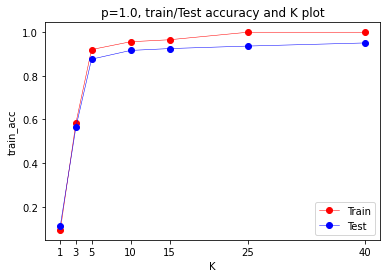

In [28]:
import matplotlib.pyplot as plt
plt.title("p=1.0, train/Test accuracy and K plot")
plt.ylabel('train_acc')
plt.xlabel('K')
plt.xticks(ticks=K_list) 
plt.plot(K_list,Train_acc.T[2],'o-', linewidth=0.5, color = 'red' ,label = 'Train')

plt.plot(K_list,Test_acc.T[2],'o-', linewidth=0.5, color = 'blue' , label = 'Test')
plt.legend()

plt.show()

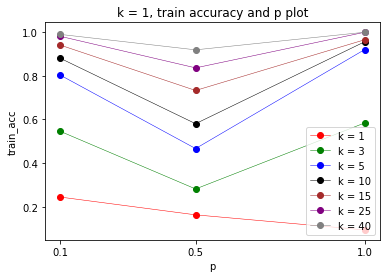

In [19]:

import matplotlib.pyplot as plt
plt.title("k = 1, train accuracy and p plot")
plt.ylabel('train_acc')
plt.xlabel('p')
plt.xticks(ticks=[0.1,0.5,1.0])   
plt.plot(P_list,Train_acc[0],'o-', linewidth=0.5, color = 'red', label = "k = 1" )
plt.plot(P_list,Train_acc[1],'o-', linewidth=0.5, color = 'green', label = "k = 3" )
plt.plot(P_list,Train_acc[2],'o-', linewidth=0.5, color = 'blue', label = "k = 5" )
plt.plot(P_list,Train_acc[3],'o-', linewidth=0.5, color = 'black', label = "k = 10" )
plt.plot(P_list,Train_acc[4],'o-', linewidth=0.5, color = 'brown', label = "k = 15" )
plt.plot(P_list,Train_acc[5],'o-', linewidth=0.5, color = 'purple', label = "k = 25" )
plt.plot(P_list,Train_acc[6],'o-', linewidth=0.5, color = 'gray', label = "k = 40" )

plt.legend()
plt.show()



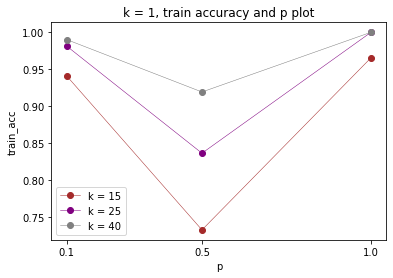

In [32]:
import matplotlib.pyplot as plt
plt.title("k = 1, train accuracy and p plot")
plt.ylabel('train_acc')
plt.xlabel('p')
plt.xticks(ticks=[0.1,0.5,1.0])   

plt.plot(P_list,Train_acc[4],'o-', linewidth=0.5, color = 'brown', label = "k = 15" )
plt.plot(P_list,Train_acc[5],'o-', linewidth=0.5, color = 'purple', label = "k = 25" )
plt.plot(P_list,Train_acc[6],'o-', linewidth=0.5, color = 'gray', label = "k = 40" )

plt.legend()
plt.show()


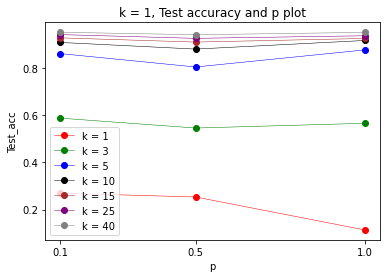

In [20]:
import matplotlib.pyplot as plt
plt.title("k = 1, Test accuracy and p plot")
plt.ylabel('Test_acc')
plt.xlabel('p')
plt.xticks(ticks=[0.1,0.5,1.0])   
plt.plot(P_list,Test_acc[0],'o-', linewidth=0.5, color = 'red', label = "k = 1" )
plt.plot(P_list,Test_acc[1],'o-', linewidth=0.5, color = 'green', label = "k = 3" )
plt.plot(P_list,Test_acc[2],'o-', linewidth=0.5, color = 'blue', label = "k = 5" )
plt.plot(P_list,Test_acc[3],'o-', linewidth=0.5, color = 'black', label = "k = 10" )
plt.plot(P_list,Test_acc[4],'o-', linewidth=0.5, color = 'brown', label = "k = 15" )
plt.plot(P_list,Test_acc[5],'o-', linewidth=0.5, color = 'purple', label = "k = 25" )
plt.plot(P_list,Test_acc[6],'o-', linewidth=0.5, color = 'gray', label = "k = 40" )

plt.legend()
plt.show()

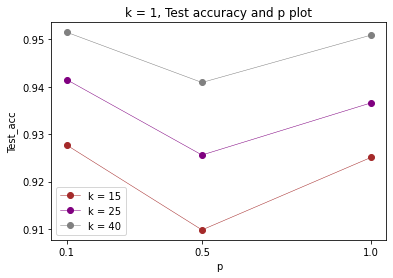

In [31]:
import matplotlib.pyplot as plt
plt.title("k = 1, Test accuracy and p plot")
plt.ylabel('Test_acc')
plt.xlabel('p')
plt.xticks(ticks=[0.1,0.5,1.0])   

plt.plot(P_list,Test_acc[4],'o-', linewidth=0.5, color = 'brown', label = "k = 15" )
plt.plot(P_list,Test_acc[5],'o-', linewidth=0.5, color = 'purple', label = "k = 25" )
plt.plot(P_list,Test_acc[6],'o-', linewidth=0.5, color = 'gray', label = "k = 40" )

plt.legend()
plt.show()

In [34]:
Test_acc[6]

array([0.9515    , 0.94090003, 0.95090002])

## 3. Adding noise

In [22]:
change_choice = np.random.choice(10000, 4000)
Train_X_change = Train_X.copy()
Train_Y_change = Train_Y.copy()
for item in change_choice:
    orgy = 0
    for i in range(10):
        if Train_Y_change[item][i] == 1:
            orgy = i
    change_int = np.random.randint(10)
    while change_int == orgy:
        change_int = np.random.randint(10)
    Train_Y_change[item][orgy] = 0.0
    Train_Y_change[item][change_int] = 1.0
    
print(Train_Y[change_choice[0]])
print(Train_Y_change[change_choice[0]])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [23]:
Train_acc_1, Test_acc_1, Train_loss_1 = grid_training(K_list, P_list, 80, Train_X_change, Train_Y_change, Test_X_data, Test_Y_data)

Epoch 1/80
157/157 [==============================] - 0s 2ms/step - loss: 2.3077 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.0892
Epoch 2/80
157/157 [==============================] - 0s 851us/step - loss: 2.3025 - accuracy: 0.1039 - val_loss: 2.3026 - val_accuracy: 0.0892
Epoch 3/80
157/157 [==============================] - 0s 864us/step - loss: 2.3023 - accuracy: 0.1008 - val_loss: 2.3024 - val_accuracy: 0.0892
Epoch 4/80
157/157 [==============================] - 0s 845us/step - loss: 2.3029 - accuracy: 0.1036 - val_loss: 2.3028 - val_accuracy: 0.0892
Epoch 5/80
157/157 [==============================] - 0s 849us/step - loss: 2.3024 - accuracy: 0.1039 - val_loss: 2.3028 - val_accuracy: 0.0892
Epoch 6/80
157/157 [==============================] - 0s 851us/step - loss: 2.3024 - accuracy: 0.1039 - val_loss: 2.3028 - val_accuracy: 0.0892
Epoch 7/80
157/157 [==============================] - 0s 864us/step - loss: 2.3024 - accuracy: 0.1039 - val_loss: 2.3028 - val_accuracy: 0

157/157 [==============================] - 0s 845us/step - loss: 2.3024 - accuracy: 0.1039 - val_loss: 2.3029 - val_accuracy: 0.0892
Epoch 58/80
157/157 [==============================] - 0s 910us/step - loss: 2.3024 - accuracy: 0.1039 - val_loss: 2.3029 - val_accuracy: 0.0892
Epoch 59/80
157/157 [==============================] - 0s 857us/step - loss: 2.3024 - accuracy: 0.1013 - val_loss: 2.3028 - val_accuracy: 0.0892
Epoch 60/80
157/157 [==============================] - 0s 858us/step - loss: 2.3024 - accuracy: 0.1005 - val_loss: 2.3028 - val_accuracy: 0.1135
Epoch 61/80
157/157 [==============================] - 0s 870us/step - loss: 2.3024 - accuracy: 0.1011 - val_loss: 2.3028 - val_accuracy: 0.1135
Epoch 62/80
157/157 [==============================] - 0s 851us/step - loss: 2.3024 - accuracy: 0.1007 - val_loss: 2.3028 - val_accuracy: 0.0892
Epoch 63/80
157/157 [==============================] - 0s 858us/step - loss: 2.3024 - accuracy: 0.1039 - val_loss: 2.3029 - val_accuracy: 0.08

157/157 [==============================] - 0s 845us/step - loss: 2.3024 - accuracy: 0.1039 - val_loss: 2.3030 - val_accuracy: 0.0892
Epoch 34/80
157/157 [==============================] - 0s 839us/step - loss: 2.3024 - accuracy: 0.0986 - val_loss: 2.3030 - val_accuracy: 0.0892
Epoch 35/80
157/157 [==============================] - 0s 858us/step - loss: 2.3024 - accuracy: 0.1012 - val_loss: 2.3029 - val_accuracy: 0.0892
Epoch 36/80
157/157 [==============================] - 0s 851us/step - loss: 2.3024 - accuracy: 0.1020 - val_loss: 2.3030 - val_accuracy: 0.0892
Epoch 37/80
157/157 [==============================] - 0s 839us/step - loss: 2.3023 - accuracy: 0.1039 - val_loss: 2.3029 - val_accuracy: 0.0892
Epoch 38/80
157/157 [==============================] - 0s 851us/step - loss: 2.3024 - accuracy: 0.0992 - val_loss: 2.3030 - val_accuracy: 0.0892
Epoch 39/80
157/157 [==============================] - 0s 845us/step - loss: 2.3024 - accuracy: 0.1007 - val_loss: 2.3030 - val_accuracy: 0.08

157/157 [==============================] - 0s 839us/step - loss: 2.3024 - accuracy: 0.1015 - val_loss: 2.3029 - val_accuracy: 0.0892
Epoch 10/80
157/157 [==============================] - 0s 819us/step - loss: 2.3024 - accuracy: 0.1009 - val_loss: 2.3029 - val_accuracy: 0.0892
Epoch 11/80
157/157 [==============================] - 0s 813us/step - loss: 2.3024 - accuracy: 0.1039 - val_loss: 2.3030 - val_accuracy: 0.0892
Epoch 12/80
157/157 [==============================] - 0s 819us/step - loss: 2.3024 - accuracy: 0.1032 - val_loss: 2.3030 - val_accuracy: 0.0892
Epoch 13/80
157/157 [==============================] - 0s 832us/step - loss: 2.3024 - accuracy: 0.1039 - val_loss: 2.3029 - val_accuracy: 0.0892
Epoch 14/80
157/157 [==============================] - 0s 839us/step - loss: 2.3024 - accuracy: 0.1006 - val_loss: 2.3030 - val_accuracy: 0.0892
Epoch 15/80
157/157 [==============================] - 0s 845us/step - loss: 2.3024 - accuracy: 0.1018 - val_loss: 2.3029 - val_accuracy: 0.08

157/157 [==============================] - 0s 819us/step - loss: 2.3024 - accuracy: 0.1039 - val_loss: 2.3030 - val_accuracy: 0.0892
Epoch 66/80
157/157 [==============================] - 0s 820us/step - loss: 2.3024 - accuracy: 0.1008 - val_loss: 2.3029 - val_accuracy: 0.0892
Epoch 67/80
157/157 [==============================] - 0s 819us/step - loss: 2.3024 - accuracy: 0.1039 - val_loss: 2.3029 - val_accuracy: 0.0892
Epoch 68/80
157/157 [==============================] - 0s 813us/step - loss: 2.3024 - accuracy: 0.1018 - val_loss: 2.3029 - val_accuracy: 0.0892
Epoch 69/80
157/157 [==============================] - 0s 819us/step - loss: 2.3024 - accuracy: 0.1039 - val_loss: 2.3029 - val_accuracy: 0.0892
Epoch 70/80
157/157 [==============================] - 0s 807us/step - loss: 2.3024 - accuracy: 0.1004 - val_loss: 2.3028 - val_accuracy: 0.1135
Epoch 71/80
157/157 [==============================] - 0s 813us/step - loss: 2.3024 - accuracy: 0.0996 - val_loss: 2.3029 - val_accuracy: 0.08

157/157 [==============================] - 0s 889us/step - loss: 1.9179 - accuracy: 0.3310 - val_loss: 1.4959 - val_accuracy: 0.4938
Epoch 42/80
157/157 [==============================] - 0s 877us/step - loss: 1.9195 - accuracy: 0.3350 - val_loss: 1.4817 - val_accuracy: 0.5087
Epoch 43/80
157/157 [==============================] - 0s 889us/step - loss: 1.9185 - accuracy: 0.3388 - val_loss: 1.4818 - val_accuracy: 0.5047
Epoch 44/80
157/157 [==============================] - 0s 864us/step - loss: 1.9200 - accuracy: 0.3319 - val_loss: 1.5996 - val_accuracy: 0.4617
Epoch 45/80
157/157 [==============================] - 0s 870us/step - loss: 1.9176 - accuracy: 0.3349 - val_loss: 1.4654 - val_accuracy: 0.5015
Epoch 46/80
157/157 [==============================] - 0s 896us/step - loss: 1.9214 - accuracy: 0.3360 - val_loss: 1.4798 - val_accuracy: 0.4895
Epoch 47/80
157/157 [==============================] - 0s 870us/step - loss: 1.9182 - accuracy: 0.3332 - val_loss: 1.4619 - val_accuracy: 0.48

157/157 [==============================] - 0s 986us/step - loss: 2.3024 - accuracy: 0.1030 - val_loss: 2.3029 - val_accuracy: 0.0891
Epoch 18/80
157/157 [==============================] - 0s 896us/step - loss: 2.3022 - accuracy: 0.1015 - val_loss: 2.3029 - val_accuracy: 0.0893
Epoch 19/80
157/157 [==============================] - 0s 870us/step - loss: 2.3019 - accuracy: 0.0989 - val_loss: 2.3029 - val_accuracy: 0.0893
Epoch 20/80
157/157 [==============================] - 0s 947us/step - loss: 2.3021 - accuracy: 0.1027 - val_loss: 2.3029 - val_accuracy: 0.0893
Epoch 21/80
157/157 [==============================] - 0s 864us/step - loss: 2.3022 - accuracy: 0.1040 - val_loss: 2.3029 - val_accuracy: 0.0893
Epoch 22/80
157/157 [==============================] - 0s 896us/step - loss: 2.3021 - accuracy: 0.1024 - val_loss: 2.3029 - val_accuracy: 0.0893
Epoch 23/80
157/157 [==============================] - 0s 877us/step - loss: 2.3022 - accuracy: 0.1040 - val_loss: 2.3029 - val_accuracy: 0.08

157/157 [==============================] - 0s 915us/step - loss: 2.3024 - accuracy: 0.1039 - val_loss: 2.3029 - val_accuracy: 0.0891
Epoch 74/80
157/157 [==============================] - 0s 902us/step - loss: 2.3024 - accuracy: 0.1001 - val_loss: 2.3030 - val_accuracy: 0.0891
Epoch 75/80
157/157 [==============================] - 0s 896us/step - loss: 2.3024 - accuracy: 0.1039 - val_loss: 2.3030 - val_accuracy: 0.0891
Epoch 76/80
157/157 [==============================] - 0s 896us/step - loss: 2.3024 - accuracy: 0.1039 - val_loss: 2.3030 - val_accuracy: 0.0891
Epoch 77/80
157/157 [==============================] - 0s 916us/step - loss: 2.3024 - accuracy: 0.1039 - val_loss: 2.3030 - val_accuracy: 0.0891
Epoch 78/80
157/157 [==============================] - 0s 873us/step - loss: 2.3024 - accuracy: 0.0992 - val_loss: 2.3029 - val_accuracy: 0.0891
Epoch 79/80
157/157 [==============================] - 0s 870us/step - loss: 2.3024 - accuracy: 0.1019 - val_loss: 2.3030 - val_accuracy: 0.08

157/157 [==============================] - 0s 877us/step - loss: 1.7388 - accuracy: 0.4988 - val_loss: 1.2726 - val_accuracy: 0.6461
Epoch 50/80
157/157 [==============================] - 0s 877us/step - loss: 1.7387 - accuracy: 0.4951 - val_loss: 1.2120 - val_accuracy: 0.6588
Epoch 51/80
157/157 [==============================] - 0s 896us/step - loss: 1.7392 - accuracy: 0.4998 - val_loss: 1.2427 - val_accuracy: 0.6781
Epoch 52/80
157/157 [==============================] - 0s 877us/step - loss: 1.7357 - accuracy: 0.5040 - val_loss: 1.2098 - val_accuracy: 0.6654
Epoch 53/80
157/157 [==============================] - 0s 877us/step - loss: 1.7381 - accuracy: 0.5008 - val_loss: 1.2131 - val_accuracy: 0.6575
Epoch 54/80
157/157 [==============================] - 0s 883us/step - loss: 1.7382 - accuracy: 0.5054 - val_loss: 1.2067 - val_accuracy: 0.6757
Epoch 55/80
157/157 [==============================] - 0s 870us/step - loss: 1.7336 - accuracy: 0.5040 - val_loss: 1.2285 - val_accuracy: 0.66

157/157 [==============================] - 0s 889us/step - loss: 2.0108 - accuracy: 0.2833 - val_loss: 1.7003 - val_accuracy: 0.4055
Epoch 26/80
157/157 [==============================] - 0s 896us/step - loss: 2.0072 - accuracy: 0.2916 - val_loss: 1.6354 - val_accuracy: 0.4307
Epoch 27/80
157/157 [==============================] - 0s 896us/step - loss: 1.9922 - accuracy: 0.3039 - val_loss: 1.6007 - val_accuracy: 0.4671
Epoch 28/80
157/157 [==============================] - 0s 940us/step - loss: 1.9725 - accuracy: 0.3142 - val_loss: 1.6224 - val_accuracy: 0.4550
Epoch 29/80
157/157 [==============================] - 0s 889us/step - loss: 1.9547 - accuracy: 0.3165 - val_loss: 1.6256 - val_accuracy: 0.4576
Epoch 30/80
157/157 [==============================] - 0s 896us/step - loss: 1.9481 - accuracy: 0.3180 - val_loss: 1.6018 - val_accuracy: 0.4614
Epoch 31/80
157/157 [==============================] - 0s 927us/step - loss: 1.9415 - accuracy: 0.3170 - val_loss: 1.5882 - val_accuracy: 0.46

157/157 [==============================] - 0s 2ms/step - loss: 2.3250 - accuracy: 0.0992 - val_loss: 2.2999 - val_accuracy: 0.1027
Epoch 2/80
157/157 [==============================] - 0s 927us/step - loss: 2.2989 - accuracy: 0.1029 - val_loss: 2.2794 - val_accuracy: 0.1337
Epoch 3/80
157/157 [==============================] - 0s 915us/step - loss: 2.2826 - accuracy: 0.1235 - val_loss: 2.1737 - val_accuracy: 0.1886
Epoch 4/80
157/157 [==============================] - 0s 908us/step - loss: 2.2587 - accuracy: 0.1445 - val_loss: 2.0922 - val_accuracy: 0.2906
Epoch 5/80
157/157 [==============================] - 0s 921us/step - loss: 2.2206 - accuracy: 0.1706 - val_loss: 1.9585 - val_accuracy: 0.3600
Epoch 6/80
157/157 [==============================] - 0s 902us/step - loss: 2.2020 - accuracy: 0.1898 - val_loss: 1.9434 - val_accuracy: 0.3496
Epoch 7/80
157/157 [==============================] - 0s 908us/step - loss: 2.1864 - accuracy: 0.1962 - val_loss: 1.9559 - val_accuracy: 0.3543
Epoch

Epoch 56/80
157/157 [==============================] - 0s 902us/step - loss: 2.0276 - accuracy: 0.2734 - val_loss: 1.6746 - val_accuracy: 0.6073
Epoch 57/80
157/157 [==============================] - 0s 889us/step - loss: 2.0262 - accuracy: 0.2784 - val_loss: 1.6031 - val_accuracy: 0.6281
Epoch 58/80
157/157 [==============================] - 0s 908us/step - loss: 2.0181 - accuracy: 0.2824 - val_loss: 1.6647 - val_accuracy: 0.6388
Epoch 59/80
157/157 [==============================] - 0s 896us/step - loss: 2.0252 - accuracy: 0.2796 - val_loss: 1.6303 - val_accuracy: 0.6374
Epoch 60/80
157/157 [==============================] - 0s 889us/step - loss: 2.0232 - accuracy: 0.2763 - val_loss: 1.6134 - val_accuracy: 0.6554
Epoch 61/80
157/157 [==============================] - 0s 883us/step - loss: 2.0102 - accuracy: 0.2854 - val_loss: 1.6069 - val_accuracy: 0.6373
Epoch 62/80
157/157 [==============================] - 0s 889us/step - loss: 2.0363 - accuracy: 0.2754 - val_loss: 1.7468 - val_ac

157/157 [==============================] - 0s 883us/step - loss: 1.6930 - accuracy: 0.5306 - val_loss: 1.1134 - val_accuracy: 0.7302
Epoch 33/80
157/157 [==============================] - 0s 877us/step - loss: 1.6894 - accuracy: 0.5322 - val_loss: 1.1280 - val_accuracy: 0.7271
Epoch 34/80
157/157 [==============================] - 0s 858us/step - loss: 1.6858 - accuracy: 0.5318 - val_loss: 1.1268 - val_accuracy: 0.7308
Epoch 35/80
157/157 [==============================] - 0s 883us/step - loss: 1.6856 - accuracy: 0.5345 - val_loss: 1.1425 - val_accuracy: 0.7170
Epoch 36/80
157/157 [==============================] - 0s 927us/step - loss: 1.6844 - accuracy: 0.5366 - val_loss: 1.1393 - val_accuracy: 0.7223
Epoch 37/80
157/157 [==============================] - 0s 889us/step - loss: 1.6828 - accuracy: 0.5344 - val_loss: 1.1175 - val_accuracy: 0.7240
Epoch 38/80
157/157 [==============================] - 0s 889us/step - loss: 1.6791 - accuracy: 0.5360 - val_loss: 1.1163 - val_accuracy: 0.73

157/157 [==============================] - 0s 908us/step - loss: 1.6589 - accuracy: 0.5291 - val_loss: 0.9739 - val_accuracy: 0.8381
Epoch 9/80
157/157 [==============================] - 0s 915us/step - loss: 1.6377 - accuracy: 0.5456 - val_loss: 0.9273 - val_accuracy: 0.8328
Epoch 10/80
157/157 [==============================] - 0s 927us/step - loss: 1.6232 - accuracy: 0.5424 - val_loss: 0.9250 - val_accuracy: 0.8517
Epoch 11/80
157/157 [==============================] - 0s 915us/step - loss: 1.5939 - accuracy: 0.5567 - val_loss: 0.8918 - val_accuracy: 0.8506
Epoch 12/80
157/157 [==============================] - 0s 927us/step - loss: 1.5880 - accuracy: 0.5553 - val_loss: 0.8531 - val_accuracy: 0.8614
Epoch 13/80
157/157 [==============================] - 0s 902us/step - loss: 1.5731 - accuracy: 0.5602 - val_loss: 0.9419 - val_accuracy: 0.8568
Epoch 14/80
157/157 [==============================] - 0s 902us/step - loss: 1.5612 - accuracy: 0.5639 - val_loss: 0.8494 - val_accuracy: 0.871

157/157 [==============================] - 0s 921us/step - loss: 1.4539 - accuracy: 0.5863 - val_loss: 0.8202 - val_accuracy: 0.8544
Epoch 65/80
157/157 [==============================] - 0s 915us/step - loss: 1.4543 - accuracy: 0.5847 - val_loss: 0.8274 - val_accuracy: 0.8473
Epoch 66/80
157/157 [==============================] - 0s 915us/step - loss: 1.4525 - accuracy: 0.5896 - val_loss: 0.8038 - val_accuracy: 0.8486
Epoch 67/80
157/157 [==============================] - 0s 921us/step - loss: 1.4562 - accuracy: 0.5844 - val_loss: 0.8048 - val_accuracy: 0.8503
Epoch 68/80
157/157 [==============================] - 0s 921us/step - loss: 1.4517 - accuracy: 0.5862 - val_loss: 0.8320 - val_accuracy: 0.8439
Epoch 69/80
157/157 [==============================] - 0s 915us/step - loss: 1.4369 - accuracy: 0.5919 - val_loss: 0.8382 - val_accuracy: 0.8476
Epoch 70/80
157/157 [==============================] - 0s 915us/step - loss: 1.4453 - accuracy: 0.5895 - val_loss: 0.8333 - val_accuracy: 0.84

157/157 [==============================] - 0s 908us/step - loss: 1.9138 - accuracy: 0.3492 - val_loss: 1.3530 - val_accuracy: 0.7767
Epoch 41/80
157/157 [==============================] - 0s 902us/step - loss: 1.9174 - accuracy: 0.3437 - val_loss: 1.4212 - val_accuracy: 0.7623
Epoch 42/80
157/157 [==============================] - 0s 915us/step - loss: 1.9051 - accuracy: 0.3488 - val_loss: 1.4285 - val_accuracy: 0.7553
Epoch 43/80
157/157 [==============================] - 0s 921us/step - loss: 1.9113 - accuracy: 0.3544 - val_loss: 1.3337 - val_accuracy: 0.7831
Epoch 44/80
157/157 [==============================] - 0s 915us/step - loss: 1.9134 - accuracy: 0.3434 - val_loss: 1.3925 - val_accuracy: 0.7724
Epoch 45/80
157/157 [==============================] - 0s 915us/step - loss: 1.9210 - accuracy: 0.3465 - val_loss: 1.3518 - val_accuracy: 0.7800
Epoch 46/80
157/157 [==============================] - 0s 908us/step - loss: 1.9159 - accuracy: 0.3495 - val_loss: 1.2813 - val_accuracy: 0.77

157/157 [==============================] - 0s 915us/step - loss: 1.4510 - accuracy: 0.6291 - val_loss: 0.7693 - val_accuracy: 0.8746
Epoch 17/80
157/157 [==============================] - 0s 953us/step - loss: 1.4472 - accuracy: 0.6297 - val_loss: 0.7589 - val_accuracy: 0.8692
Epoch 18/80
157/157 [==============================] - 0s 915us/step - loss: 1.4384 - accuracy: 0.6298 - val_loss: 0.7628 - val_accuracy: 0.8773
Epoch 19/80
157/157 [==============================] - 0s 915us/step - loss: 1.4334 - accuracy: 0.6316 - val_loss: 0.8057 - val_accuracy: 0.8721
Epoch 20/80
157/157 [==============================] - 0s 908us/step - loss: 1.4270 - accuracy: 0.6335 - val_loss: 0.7416 - val_accuracy: 0.8713
Epoch 21/80
157/157 [==============================] - 0s 902us/step - loss: 1.4244 - accuracy: 0.6328 - val_loss: 0.7729 - val_accuracy: 0.8735
Epoch 22/80
157/157 [==============================] - 0s 915us/step - loss: 1.4201 - accuracy: 0.6334 - val_loss: 0.7491 - val_accuracy: 0.87

157/157 [==============================] - 0s 953us/step - loss: 1.3073 - accuracy: 0.6489 - val_loss: 0.8034 - val_accuracy: 0.8271
Epoch 73/80
157/157 [==============================] - 0s 921us/step - loss: 1.3080 - accuracy: 0.6497 - val_loss: 0.7552 - val_accuracy: 0.8373
Epoch 74/80
157/157 [==============================] - 0s 927us/step - loss: 1.3051 - accuracy: 0.6494 - val_loss: 0.7462 - val_accuracy: 0.8423
Epoch 75/80
157/157 [==============================] - 0s 921us/step - loss: 1.3046 - accuracy: 0.6502 - val_loss: 0.7670 - val_accuracy: 0.8341
Epoch 76/80
157/157 [==============================] - 0s 921us/step - loss: 1.3024 - accuracy: 0.6496 - val_loss: 0.7557 - val_accuracy: 0.8366
Epoch 77/80
157/157 [==============================] - 0s 915us/step - loss: 1.2993 - accuracy: 0.6498 - val_loss: 0.7676 - val_accuracy: 0.8310
Epoch 78/80
157/157 [==============================] - 0s 915us/step - loss: 1.2989 - accuracy: 0.6496 - val_loss: 0.7681 - val_accuracy: 0.82

157/157 [==============================] - 0s 927us/step - loss: 1.3920 - accuracy: 0.6027 - val_loss: 0.8255 - val_accuracy: 0.8546
Epoch 49/80
157/157 [==============================] - 0s 908us/step - loss: 1.3883 - accuracy: 0.6009 - val_loss: 0.7978 - val_accuracy: 0.8551
Epoch 50/80
157/157 [==============================] - 0s 921us/step - loss: 1.4000 - accuracy: 0.5993 - val_loss: 0.8505 - val_accuracy: 0.8502
Epoch 51/80
157/157 [==============================] - 0s 934us/step - loss: 1.3793 - accuracy: 0.6057 - val_loss: 0.8085 - val_accuracy: 0.8529
Epoch 52/80
157/157 [==============================] - 0s 908us/step - loss: 1.3854 - accuracy: 0.6031 - val_loss: 0.8083 - val_accuracy: 0.8518
Epoch 53/80
157/157 [==============================] - 0s 915us/step - loss: 1.3938 - accuracy: 0.6019 - val_loss: 0.7869 - val_accuracy: 0.8578
Epoch 54/80
157/157 [==============================] - 0s 902us/step - loss: 1.3758 - accuracy: 0.6076 - val_loss: 0.8714 - val_accuracy: 0.84

157/157 [==============================] - 0s 902us/step - loss: 1.8984 - accuracy: 0.3732 - val_loss: 1.3644 - val_accuracy: 0.8363
Epoch 25/80
157/157 [==============================] - 0s 908us/step - loss: 1.8973 - accuracy: 0.3708 - val_loss: 1.2717 - val_accuracy: 0.8505
Epoch 26/80
157/157 [==============================] - 0s 902us/step - loss: 1.8951 - accuracy: 0.3728 - val_loss: 1.3332 - val_accuracy: 0.8344
Epoch 27/80
157/157 [==============================] - 0s 908us/step - loss: 1.8887 - accuracy: 0.3763 - val_loss: 1.3943 - val_accuracy: 0.8389
Epoch 28/80
157/157 [==============================] - 0s 902us/step - loss: 1.8704 - accuracy: 0.3834 - val_loss: 1.3702 - val_accuracy: 0.8412
Epoch 29/80
157/157 [==============================] - 0s 896us/step - loss: 1.8789 - accuracy: 0.3763 - val_loss: 1.3228 - val_accuracy: 0.8449
Epoch 30/80
157/157 [==============================] - 0s 908us/step - loss: 1.8794 - accuracy: 0.3747 - val_loss: 1.3334 - val_accuracy: 0.83

157/157 [==============================] - 0s 908us/step - loss: 1.8112 - accuracy: 0.4015 - val_loss: 1.2793 - val_accuracy: 0.8470
Epoch 1/80
157/157 [==============================] - 0s 2ms/step - loss: 2.1092 - accuracy: 0.2753 - val_loss: 1.5146 - val_accuracy: 0.5034
Epoch 2/80
157/157 [==============================] - 0s 896us/step - loss: 1.8355 - accuracy: 0.4638 - val_loss: 1.0885 - val_accuracy: 0.7687
Epoch 3/80
157/157 [==============================] - 0s 896us/step - loss: 1.6840 - accuracy: 0.5643 - val_loss: 0.9677 - val_accuracy: 0.8249
Epoch 4/80
157/157 [==============================] - 0s 883us/step - loss: 1.5841 - accuracy: 0.5909 - val_loss: 0.8240 - val_accuracy: 0.8623
Epoch 5/80
157/157 [==============================] - 0s 896us/step - loss: 1.5413 - accuracy: 0.6014 - val_loss: 0.8017 - val_accuracy: 0.8595
Epoch 6/80
157/157 [==============================] - 0s 896us/step - loss: 1.5100 - accuracy: 0.6108 - val_loss: 0.7795 - val_accuracy: 0.8778
Epoch

157/157 [==============================] - 0s 902us/step - loss: 1.2272 - accuracy: 0.6591 - val_loss: 0.7605 - val_accuracy: 0.8406
Epoch 57/80
157/157 [==============================] - 0s 883us/step - loss: 1.2244 - accuracy: 0.6615 - val_loss: 0.7833 - val_accuracy: 0.8292
Epoch 58/80
157/157 [==============================] - 0s 877us/step - loss: 1.2242 - accuracy: 0.6593 - val_loss: 0.8080 - val_accuracy: 0.8226
Epoch 59/80
157/157 [==============================] - 0s 921us/step - loss: 1.2243 - accuracy: 0.6596 - val_loss: 0.7840 - val_accuracy: 0.8313
Epoch 60/80
157/157 [==============================] - 0s 889us/step - loss: 1.2194 - accuracy: 0.6606 - val_loss: 0.7968 - val_accuracy: 0.8257
Epoch 61/80
157/157 [==============================] - 0s 889us/step - loss: 1.2134 - accuracy: 0.6619 - val_loss: 0.8311 - val_accuracy: 0.8190
Epoch 62/80
157/157 [==============================] - 0s 902us/step - loss: 1.2139 - accuracy: 0.6612 - val_loss: 0.7861 - val_accuracy: 0.82

Epoch 33/80
157/157 [==============================] - 0s 947us/step - loss: 1.2963 - accuracy: 0.6386 - val_loss: 0.7156 - val_accuracy: 0.8753
Epoch 34/80
157/157 [==============================] - 0s 940us/step - loss: 1.2906 - accuracy: 0.6375 - val_loss: 0.7339 - val_accuracy: 0.8677
Epoch 35/80
157/157 [==============================] - 0s 947us/step - loss: 1.2796 - accuracy: 0.6422 - val_loss: 0.7016 - val_accuracy: 0.8756
Epoch 36/80
157/157 [==============================] - 0s 947us/step - loss: 1.2743 - accuracy: 0.6431 - val_loss: 0.6604 - val_accuracy: 0.8714
Epoch 37/80
157/157 [==============================] - 0s 966us/step - loss: 1.2756 - accuracy: 0.6376 - val_loss: 0.7653 - val_accuracy: 0.8604
Epoch 38/80
157/157 [==============================] - 0s 947us/step - loss: 1.2681 - accuracy: 0.6403 - val_loss: 0.7772 - val_accuracy: 0.8652
Epoch 39/80
157/157 [==============================] - 0s 953us/step - loss: 1.2564 - accuracy: 0.6423 - val_loss: 0.7584 - val_ac

157/157 [==============================] - 0s 966us/step - loss: 1.7986 - accuracy: 0.4448 - val_loss: 1.0327 - val_accuracy: 0.8765
Epoch 10/80
157/157 [==============================] - 0s 959us/step - loss: 1.7847 - accuracy: 0.4474 - val_loss: 1.0358 - val_accuracy: 0.8769
Epoch 11/80
157/157 [==============================] - 0s 953us/step - loss: 1.7792 - accuracy: 0.4559 - val_loss: 1.0432 - val_accuracy: 0.8768
Epoch 12/80
157/157 [==============================] - 0s 985us/step - loss: 1.7719 - accuracy: 0.4582 - val_loss: 1.0804 - val_accuracy: 0.8727
Epoch 13/80
157/157 [==============================] - 0s 953us/step - loss: 1.7469 - accuracy: 0.4626 - val_loss: 1.0123 - val_accuracy: 0.8754
Epoch 14/80
157/157 [==============================] - 0s 953us/step - loss: 1.7386 - accuracy: 0.4752 - val_loss: 1.0554 - val_accuracy: 0.8829
Epoch 15/80
157/157 [==============================] - 0s 953us/step - loss: 1.7456 - accuracy: 0.4797 - val_loss: 1.0279 - val_accuracy: 0.88

157/157 [==============================] - 0s 959us/step - loss: 1.6126 - accuracy: 0.5225 - val_loss: 0.9876 - val_accuracy: 0.8743
Epoch 66/80
157/157 [==============================] - 0s 947us/step - loss: 1.5984 - accuracy: 0.5261 - val_loss: 0.8626 - val_accuracy: 0.8788
Epoch 67/80
157/157 [==============================] - 0s 947us/step - loss: 1.6144 - accuracy: 0.5200 - val_loss: 0.9305 - val_accuracy: 0.8753
Epoch 68/80
157/157 [==============================] - 0s 953us/step - loss: 1.6077 - accuracy: 0.5244 - val_loss: 0.8953 - val_accuracy: 0.8765
Epoch 69/80
157/157 [==============================] - 0s 959us/step - loss: 1.5941 - accuracy: 0.5233 - val_loss: 0.9705 - val_accuracy: 0.8763
Epoch 70/80
157/157 [==============================] - 0s 953us/step - loss: 1.6014 - accuracy: 0.5229 - val_loss: 0.9626 - val_accuracy: 0.8772
Epoch 71/80
157/157 [==============================] - 0s 1ms/step - loss: 1.6079 - accuracy: 0.5296 - val_loss: 0.9633 - val_accuracy: 0.8748

Epoch 42/80
157/157 [==============================] - 0s 934us/step - loss: 1.1210 - accuracy: 0.6761 - val_loss: 0.7744 - val_accuracy: 0.8161
Epoch 43/80
157/157 [==============================] - 0s 966us/step - loss: 1.1151 - accuracy: 0.6783 - val_loss: 0.7849 - val_accuracy: 0.8077
Epoch 44/80
157/157 [==============================] - 0s 927us/step - loss: 1.1071 - accuracy: 0.6817 - val_loss: 0.7761 - val_accuracy: 0.8085
Epoch 45/80
157/157 [==============================] - 0s 940us/step - loss: 1.1029 - accuracy: 0.6787 - val_loss: 0.8136 - val_accuracy: 0.8047
Epoch 46/80
157/157 [==============================] - 0s 947us/step - loss: 1.1012 - accuracy: 0.6823 - val_loss: 0.7806 - val_accuracy: 0.8084
Epoch 47/80
157/157 [==============================] - 0s 921us/step - loss: 1.0917 - accuracy: 0.6817 - val_loss: 0.7890 - val_accuracy: 0.8013
Epoch 48/80
157/157 [==============================] - 0s 921us/step - loss: 1.0890 - accuracy: 0.6839 - val_loss: 0.8282 - val_ac

Epoch 19/80
157/157 [==============================] - 0s 1ms/step - loss: 1.2850 - accuracy: 0.6453 - val_loss: 0.6866 - val_accuracy: 0.8859
Epoch 20/80
157/157 [==============================] - 0s 1ms/step - loss: 1.2702 - accuracy: 0.6453 - val_loss: 0.6912 - val_accuracy: 0.8856
Epoch 21/80
157/157 [==============================] - 0s 1ms/step - loss: 1.2716 - accuracy: 0.6462 - val_loss: 0.7062 - val_accuracy: 0.8790
Epoch 22/80
157/157 [==============================] - 0s 1ms/step - loss: 1.2601 - accuracy: 0.6474 - val_loss: 0.6848 - val_accuracy: 0.8759
Epoch 23/80
157/157 [==============================] - 0s 1ms/step - loss: 1.2537 - accuracy: 0.6488 - val_loss: 0.7309 - val_accuracy: 0.8688
Epoch 24/80
157/157 [==============================] - 0s 1ms/step - loss: 1.2410 - accuracy: 0.6515 - val_loss: 0.6813 - val_accuracy: 0.8711
Epoch 25/80
157/157 [==============================] - 0s 1ms/step - loss: 1.2326 - accuracy: 0.6490 - val_loss: 0.6844 - val_accuracy: 0.8687

157/157 [==============================] - 0s 1ms/step - loss: 0.9259 - accuracy: 0.7091 - val_loss: 0.8519 - val_accuracy: 0.7848
Epoch 77/80
157/157 [==============================] - 0s 997us/step - loss: 0.9194 - accuracy: 0.7101 - val_loss: 0.8569 - val_accuracy: 0.7832
Epoch 78/80
157/157 [==============================] - 0s 997us/step - loss: 0.9253 - accuracy: 0.7062 - val_loss: 0.9031 - val_accuracy: 0.7684
Epoch 79/80
157/157 [==============================] - 0s 997us/step - loss: 0.9090 - accuracy: 0.7111 - val_loss: 0.8983 - val_accuracy: 0.7716
Epoch 80/80
157/157 [==============================] - 0s 997us/step - loss: 0.9102 - accuracy: 0.7134 - val_loss: 0.8750 - val_accuracy: 0.7761
Epoch 1/80
157/157 [==============================] - 0s 2ms/step - loss: 2.0892 - accuracy: 0.3137 - val_loss: 1.2822 - val_accuracy: 0.7613
Epoch 2/80
157/157 [==============================] - 0s 991us/step - loss: 1.9027 - accuracy: 0.4270 - val_loss: 1.1466 - val_accuracy: 0.8371
Epo

Epoch 53/80
157/157 [==============================] - 0s 978us/step - loss: 1.4853 - accuracy: 0.5754 - val_loss: 0.8000 - val_accuracy: 0.8881
Epoch 54/80
157/157 [==============================] - 0s 991us/step - loss: 1.4958 - accuracy: 0.5727 - val_loss: 0.7931 - val_accuracy: 0.8894
Epoch 55/80
157/157 [==============================] - 0s 985us/step - loss: 1.4835 - accuracy: 0.5728 - val_loss: 0.7813 - val_accuracy: 0.8945
Epoch 56/80
157/157 [==============================] - 0s 985us/step - loss: 1.4869 - accuracy: 0.5695 - val_loss: 0.8298 - val_accuracy: 0.8829
Epoch 57/80
157/157 [==============================] - 0s 985us/step - loss: 1.4898 - accuracy: 0.5679 - val_loss: 0.8639 - val_accuracy: 0.8867
Epoch 58/80
157/157 [==============================] - 0s 972us/step - loss: 1.4645 - accuracy: 0.5713 - val_loss: 0.8152 - val_accuracy: 0.8855
Epoch 59/80
157/157 [==============================] - 0s 978us/step - loss: 1.4815 - accuracy: 0.5698 - val_loss: 0.7990 - val_ac

157/157 [==============================] - 0s 934us/step - loss: 1.0248 - accuracy: 0.6999 - val_loss: 0.7055 - val_accuracy: 0.8319
Epoch 30/80
157/157 [==============================] - 0s 915us/step - loss: 1.0181 - accuracy: 0.7051 - val_loss: 0.7571 - val_accuracy: 0.8096
Epoch 31/80
157/157 [==============================] - 0s 927us/step - loss: 1.0092 - accuracy: 0.7040 - val_loss: 0.7907 - val_accuracy: 0.7994
Epoch 32/80
157/157 [==============================] - 0s 927us/step - loss: 0.9941 - accuracy: 0.7075 - val_loss: 0.7554 - val_accuracy: 0.8112
Epoch 33/80
157/157 [==============================] - 0s 934us/step - loss: 0.9881 - accuracy: 0.7108 - val_loss: 0.7511 - val_accuracy: 0.8164
Epoch 34/80
157/157 [==============================] - 0s 934us/step - loss: 0.9677 - accuracy: 0.7160 - val_loss: 0.8268 - val_accuracy: 0.7858
Epoch 35/80
157/157 [==============================] - 0s 921us/step - loss: 0.9666 - accuracy: 0.7170 - val_loss: 0.7865 - val_accuracy: 0.80

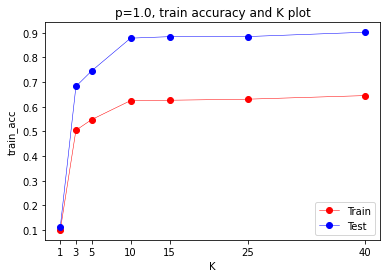

In [30]:
import matplotlib.pyplot as plt
plt.title("p=1.0, train accuracy and K plot")
plt.ylabel('train_acc')
plt.xlabel('K')
plt.xticks(ticks=K_list) 
plt.plot(K_list,Train_acc_1.T[2],'o-', linewidth=0.5, color = 'red' , label = "Train")
plt.plot(K_list,Test_acc_1.T[2],'o-', linewidth=0.5, color = 'blue' , label = 'Test')
plt.legend()



plt.show()

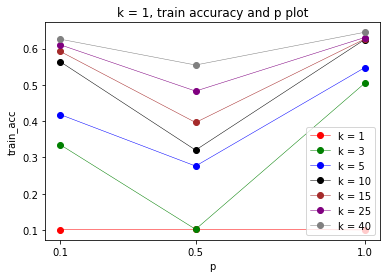

In [25]:
import matplotlib.pyplot as plt
plt.title("k = 1, train accuracy and p plot")
plt.ylabel('train_acc')
plt.xlabel('p')
plt.xticks(ticks=[0.1,0.5,1.0])   
plt.plot(P_list,Train_acc_1[0],'o-', linewidth=0.5, color = 'red', label = "k = 1" )
plt.plot(P_list,Train_acc_1[1],'o-', linewidth=0.5, color = 'green', label = "k = 3" )
plt.plot(P_list,Train_acc_1[2],'o-', linewidth=0.5, color = 'blue', label = "k = 5" )
plt.plot(P_list,Train_acc_1[3],'o-', linewidth=0.5, color = 'black', label = "k = 10" )
plt.plot(P_list,Train_acc_1[4],'o-', linewidth=0.5, color = 'brown', label = "k = 15" )
plt.plot(P_list,Train_acc_1[5],'o-', linewidth=0.5, color = 'purple', label = "k = 25" )
plt.plot(P_list,Train_acc_1[6],'o-', linewidth=0.5, color = 'gray', label = "k = 40" )

plt.legend()
plt.show()

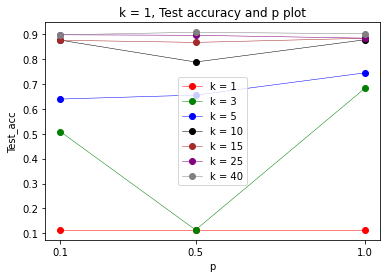

In [26]:
import matplotlib.pyplot as plt
plt.title("k = 1, Test accuracy and p plot")
plt.ylabel('Test_acc')
plt.xlabel('p')
plt.xticks(ticks=[0.1,0.5,1.0])   
plt.plot(P_list,Test_acc_1[0],'o-', linewidth=0.5, color = 'red', label = "k = 1" )
plt.plot(P_list,Test_acc_1[1],'o-', linewidth=0.5, color = 'green', label = "k = 3" )
plt.plot(P_list,Test_acc_1[2],'o-', linewidth=0.5, color = 'blue', label = "k = 5" )
plt.plot(P_list,Test_acc_1[3],'o-', linewidth=0.5, color = 'black', label = "k = 10" )
plt.plot(P_list,Test_acc_1[4],'o-', linewidth=0.5, color = 'brown', label = "k = 15" )
plt.plot(P_list,Test_acc_1[5],'o-', linewidth=0.5, color = 'purple', label = "k = 25" )
plt.plot(P_list,Test_acc_1[6],'o-', linewidth=0.5, color = 'gray', label = "k = 40" )

plt.legend()
plt.show()

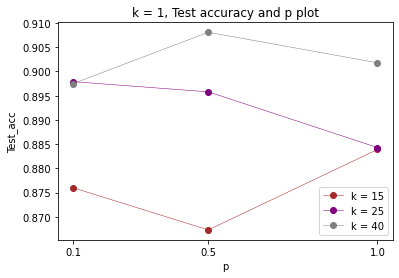

In [33]:
import matplotlib.pyplot as plt
plt.title("k = 1, Test accuracy and p plot")
plt.ylabel('Test_acc')
plt.xlabel('p')
plt.xticks(ticks=[0.1,0.5,1.0])   

plt.plot(P_list,Test_acc_1[4],'o-', linewidth=0.5, color = 'brown', label = "k = 15" )
plt.plot(P_list,Test_acc_1[5],'o-', linewidth=0.5, color = 'purple', label = "k = 25" )
plt.plot(P_list,Test_acc_1[6],'o-', linewidth=0.5, color = 'gray', label = "k = 40" )

plt.legend()
plt.show()

In [35]:
print(P_list,Test_acc_1[6])

[0.1, 0.5, 1.0] [0.89749998 0.90810001 0.90179998]
